In [241]:
#Import necessary variables and dataset from NBA shot logs from 2015 season
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

dataset=pd.read_csv(r'C:\Users\Abdul\Desktop\Fall 2019\Job Search\NBA\shot_logs.csv')
dataset.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
FGM,,,,,,,,,,,,,,
0,2.140045e+07,-0.497691,6.542657,2.484009,11.942123,2.132005,2.891154,15.119539,2.313280,159226.982242,4.125705,0.0,0.000000,157605.897569
1,2.140045e+07,1.064692,6.463570,2.451757,13.062838,1.891702,2.614132,11.695738,2.205768,158810.086279,4.119755,1.0,2.205768,156792.770952


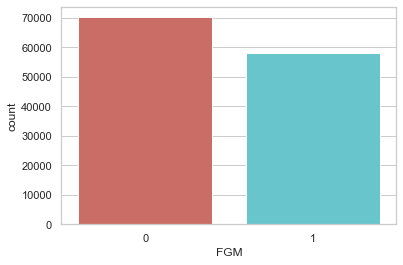

In [242]:
#Exploring dataset
dataset['FGM'].value_counts()
sns.countplot(x='FGM',data=dataset, palette='hls')
dataset.groupby(y).mean()

In [243]:
#Describe the dataset
dataset.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [244]:
#Encode labels
le = LabelEncoder()
dataset['PERIOD'] = le.fit_transform(dataset['PERIOD'])
dataset['GAME_CLOCK'] = le.fit_transform(dataset['GAME_CLOCK'])
dataset['LOCATION'] = le.fit_transform(dataset['LOCATION'])
dataset.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,W,24,1,0,188,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,W,24,2,0,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,W,24,3,0,0,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,W,24,4,1,167,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,W,24,5,1,94,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [245]:
#Begin feature engineering by estabilishing variable of interest, selecting features and putting them in X
y = dataset['FGM']

features = ['GAME_CLOCK','DRIBBLES','SHOT_DIST','CLOSE_DEF_DIST','LOCATION']

X=dataset[features]

dataset.sample(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
7151,21400797,"FEB 11, 2015 - UTA @ DAL",0,L,-5,7,3,83,12.9,5,...,3.0,2,made,"James, Bernard",203108,3.5,1,2,dante exum,203957
40049,21400027,"NOV 01, 2014 - DAL @ NOP",0,W,5,3,0,446,13.6,0,...,21.4,2,made,"Davis, Anthony",203076,6.1,1,2,dirk nowtizski,1717
124647,21400075,"NOV 07, 2014 - BKN vs. NYK",1,W,11,6,1,329,17.6,0,...,2.1,2,made,"Smith, J.R.",2747,5.3,1,2,mirza teletovic,203141
14624,21400365,"DEC 16, 2014 - GSW @ MEM",0,L,-7,13,2,549,15.9,6,...,25.8,3,missed,"Conley, Mike",201144,3.4,0,0,stephen curry,201939
71408,21400441,"DEC 26, 2014 - PHI @ POR",0,L,-21,4,1,228,11.7,2,...,17.0,2,made,"Batum, Nicolas",201587,5.5,1,2,robert covington,203496


In [246]:
#Scale, fit, and transform the data to put into a consistent form
s = StandardScaler()
X = s.fit_transform(X)

In [247]:
#Split the dataset into a training and testing grouping
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [248]:
#Fit the trained values to a LogisticRegression and predict the test values
log = LogisticRegression()
log.fit(X_train,y_train)

y_pred = log.predict(X)
y_prob = log.predict_proba(X)

C:\Users\Abdul\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [254]:
#Put the prediction and probabilities back into model and print results
dataset['predictions'] = y_pred
dataset['probability of making shot'] = y_prob[:,1]
print("Model coefficients =")
print(temp.coef_[0])
print("Model Accuracy =") 
print(metrics.accuracy_score(y,y_pred))

Model coefficients =
[ 0.01695412  0.10240315 -0.19331708 -0.55982852  0.28990299]
Model Accuracy =
0.6047677423888685


In [255]:
#Check the null score
nullscore = max(y_test.mean(), 1-y_test.mean())
print(nullscore)

0.5478609187235006


In [257]:
#Confusion matrix to show the model accuracy
metrics.confusion_matrix(y,y_pred)

array([[49126, 21038],
       [29579, 28326]], dtype=int64)

In [266]:
#Look at model results in summary page
import statsmodels.api as sm
Stats_model=sm.Logit(y,X)
result=Stats_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.666605
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.032      
Dependent Variable: FGM              AIC:              170752.8392
Date:               2019-10-09 22:39 BIC:              170801.6408
No. Observations:   128069           Log-Likelihood:   -85371.    
Df Model:           4                LL-Null:          -88183.    
Df Residuals:       128064           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1     0.0150      0.0058      2.6013    0.0093     0.0037     0.0263
x2    -0.0718      0.0059    -12.2212    